Epoch 1/70
235/235 [==============================] - 3s 9ms/step - loss: 0.3785 - accuracy: 0.0075 - val_loss: 0.3184 - val_accuracy: 0.0112
Epoch 2/70
235/235 [==============================] - 1s 6ms/step - loss: 0.3078 - accuracy: 0.0136 - val_loss: 0.3042 - val_accuracy: 0.0163
Epoch 3/70
235/235 [==============================] - 1s 5ms/step - loss: 0.2989 - accuracy: 0.0143 - val_loss: 0.2986 - val_accuracy: 0.0158
Epoch 4/70
235/235 [==============================] - 1s 5ms/step - loss: 0.2945 - accuracy: 0.0162 - val_loss: 0.2949 - val_accuracy: 0.0173
Epoch 5/70
235/235 [==============================] - 1s 5ms/step - loss: 0.2916 - accuracy: 0.0178 - val_loss: 0.2923 - val_accuracy: 0.0176
Epoch 6/70
235/235 [==============================] - 1s 5ms/step - loss: 0.2893 - accuracy: 0.0198 - val_loss: 0.2916 - val_accuracy: 0.0175
Epoch 7/70
235/235 [==============================] - 1s 5ms/step - loss: 0.2876 - accuracy: 0.0205 - val_loss: 0.2889 - val_accuracy: 0.0191
Epoch 

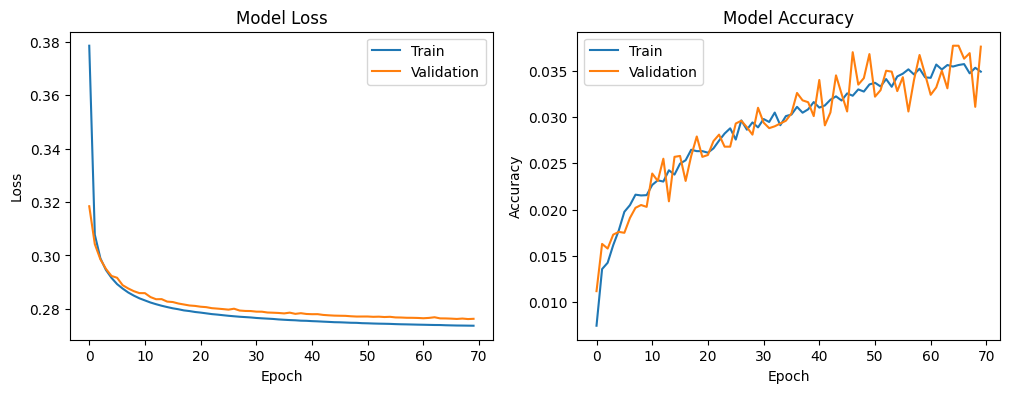

313/313 [==============================] - 1s 2ms/step


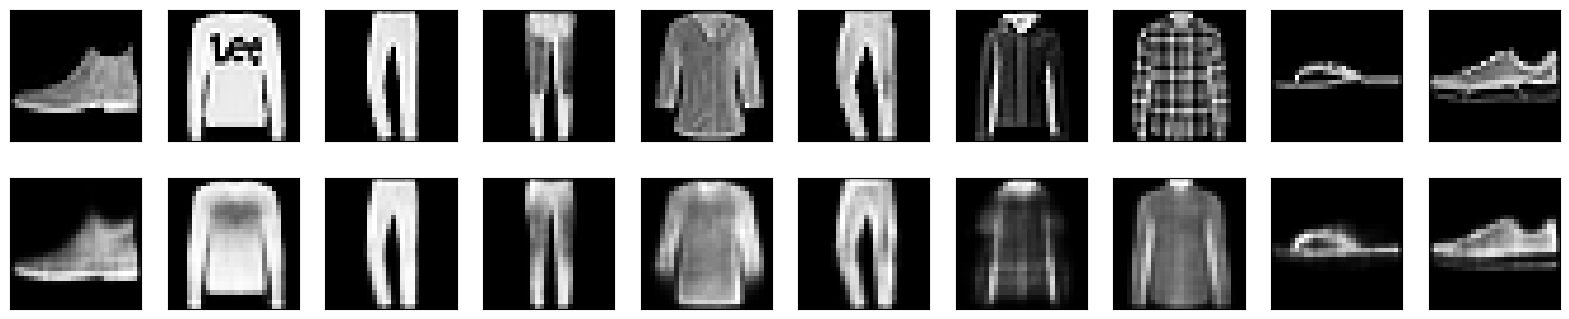

In [4]:
##After adding multiple layers and modifying optimizers

import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
hidden_layer_1 = 128
hidden_layer_2 = 64

# this is our input placeholder
input_img = Input(shape=(784,))

#add another layer
hidden_layer1 = Dense(hidden_layer_1, activation='relu')(input_img)
dropout1 = Dropout(0.2)(hidden_layer1)
hidden_layer2 = Dense(hidden_layer_2, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(hidden_layer2)

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded_layer1 = Dense(hidden_layer_2, activation='relu')(encoded)
decoded_layer2 = Dense(hidden_layer_1, activation='relu')(decoded_layer1)
decoded = Dense(784, activation='sigmoid')(decoded_layer2)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history =autoencoder.fit(x_train, x_train,
                epochs=70,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Do the prediction on the test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize one of the reconstructed versions of the test data and its noisy counterpart
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
